In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
# 처리할 이미지 범위 지정
start = 7 
end = 10

# 개별 이미지들의 처리 point 좌표 (x, y)
total_pts = {}
for i in range(start, end+1):
    total_pts[i] = {'p1' : [],  # 생장 영역 좌표 
                    'p2' : []}  # 유지 영역 좌표 

### Image Data

In [7]:
root_path = 'F:/RGB-NIR/'
mode = 3

data_path = root_path + str(mode)

ndvi_path = data_path + '/' + 'NDVI_re'  # NDVI 이미지 폴더 경로
ndvi785_path = data_path + '/' + 'NDVI_785'  # NDVI 785 이미지 폴더 경로

ndvi_img_list = os.listdir(ndvi_path)
ndvi_img_dict = {idx:ndvi_path+'/'+ img_path for idx, img_path in enumerate(ndvi_img_list)}   

ndvi785_img_list = os.listdir(ndvi785_path)
ndvi785_img_dict = {idx:ndvi785_path+'/'+img_path for idx, img_path in enumerate(ndvi785_img_list)}   

In [8]:
ndvi_img_dict 

{0: 'F:/RGB-NIR/3/NDVI_re/211130_3.bmp',
 1: 'F:/RGB-NIR/3/NDVI_re/211201_3.bmp',
 2: 'F:/RGB-NIR/3/NDVI_re/211202_3.bmp',
 3: 'F:/RGB-NIR/3/NDVI_re/211203_3.bmp',
 4: 'F:/RGB-NIR/3/NDVI_re/211204_3.bmp',
 5: 'F:/RGB-NIR/3/NDVI_re/211205_3.bmp',
 6: 'F:/RGB-NIR/3/NDVI_re/211206_3.bmp',
 7: 'F:/RGB-NIR/3/NDVI_re/211207_3.bmp',
 8: 'F:/RGB-NIR/3/NDVI_re/211208_3.bmp',
 9: 'F:/RGB-NIR/3/NDVI_re/211209_3.bmp',
 10: 'F:/RGB-NIR/3/NDVI_re/211210_3.bmp',
 11: 'F:/RGB-NIR/3/NDVI_re/211211_3.bmp',
 12: 'F:/RGB-NIR/3/NDVI_re/211212_3.bmp',
 13: 'F:/RGB-NIR/3/NDVI_re/211213_3.bmp',
 14: 'F:/RGB-NIR/3/NDVI_re/211214_3.bmp',
 15: 'F:/RGB-NIR/3/NDVI_re/211215_3.bmp',
 16: 'F:/RGB-NIR/3/NDVI_re/211216_3.bmp',
 17: 'F:/RGB-NIR/3/NDVI_re/211217_3.bmp',
 18: 'F:/RGB-NIR/3/NDVI_re/211218_3.bmp',
 19: 'F:/RGB-NIR/3/NDVI_re/211219_3.bmp',
 20: 'F:/RGB-NIR/3/NDVI_re/211220_3.bmp',
 21: 'F:/RGB-NIR/3/NDVI_re/211221_3.bmp',
 22: 'F:/RGB-NIR/3/NDVI_re/211222_3.bmp',
 23: 'F:/RGB-NIR/3/NDVI_re/211223_3.bmp',
 2

### 마우스 클릭으로 좌표 추출

In [9]:
# 마우스 이벤트 처리 함수 (참고: https://github.com/gymoon10/OpenCV/blob/main/OpenCV%20%EC%82%AC%EC%9A%A9%EB%B2%95.ipynb)
def on_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    # 좌클릭에 반응
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        print('EVENT_LBUTTONDOWN: %d, %d' % (x, y))
        
        result.append((x, y))
        
    return result

In [30]:
# 개별 이미지 별로 생장 영역(p1) 좌표 추출
# 각 이미지 마다 생장 영역의 좌표들을 좌클릭, esc를 누르면 다음 이미지로 넘어감
for i in range(start, end+1):
    img = cv2.imread(ndvi_img_dict[i])  # NDVI 이미지
    result = []
    
    cv2.namedWindow('image')
    cv2.setMouseCallback('image', on_mouse, img) # 발생하는 마우스 이벤트를 반영
    
    # 텍스트
    text = ndvi_img_dict[i].split('/')[-1]
    cv2.putText(img, text, (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (255, 255, 255), 1, cv2.LINE_AA)
    
    text = 'Click the Points of Growth Areas (Press ESC to move on to the next image)'
    cv2.putText(img, text, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (255, 255, 255), 1, cv2.LINE_AA)

    cv2.imshow('image', img)
    cv2.waitKey()

    cv2.destroyAllWindows()
    
    total_pts[i]['p1'] = result

EVENT_LBUTTONDOWN: 687, 413
EVENT_LBUTTONDOWN: 695, 385
EVENT_LBUTTONDOWN: 709, 368
EVENT_LBUTTONDOWN: 732, 351
EVENT_LBUTTONDOWN: 743, 342
EVENT_LBUTTONDOWN: 749, 273
EVENT_LBUTTONDOWN: 772, 279
EVENT_LBUTTONDOWN: 775, 308
EVENT_LBUTTONDOWN: 735, 317
EVENT_LBUTTONDOWN: 742, 337
EVENT_LBUTTONDOWN: 771, 334
EVENT_LBUTTONDOWN: 731, 357
EVENT_LBUTTONDOWN: 705, 358
EVENT_LBUTTONDOWN: 736, 385
EVENT_LBUTTONDOWN: 715, 408
EVENT_LBUTTONDOWN: 779, 237
EVENT_LBUTTONDOWN: 750, 263
EVENT_LBUTTONDOWN: 727, 294
EVENT_LBUTTONDOWN: 713, 339
EVENT_LBUTTONDOWN: 696, 377
EVENT_LBUTTONDOWN: 692, 395
EVENT_LBUTTONDOWN: 736, 204
EVENT_LBUTTONDOWN: 775, 214
EVENT_LBUTTONDOWN: 747, 242
EVENT_LBUTTONDOWN: 771, 250
EVENT_LBUTTONDOWN: 739, 307
EVENT_LBUTTONDOWN: 696, 308
EVENT_LBUTTONDOWN: 737, 332
EVENT_LBUTTONDOWN: 710, 367


In [31]:
# 개별 이미지 별로 유지 영역(p1) 좌표 추출
# 각 이미지 마다 유지 영역의 좌표들을 좌클릭, esc를 누르면 다음 이미지로 넘어감
for i in range(start, end+1):
    img = cv2.imread(ndvi_img_dict[i])  # NDVI 이미지
    result = []
    
    cv2.namedWindow('image')
    cv2.setMouseCallback('image', on_mouse, img) # 발생하는 마우스 이벤트를 반영
    
    # 텍스트
    text = ndvi_img_dict[i].split('/')[-1]
    cv2.putText(img, text, (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (255, 255, 255), 1, cv2.LINE_AA)
    
    text = 'Click the Points of Non-Growth Areas (Press ESC to move on to the next image)'
    cv2.putText(img, text, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (255, 255, 255), 1, cv2.LINE_AA)

    cv2.imshow('image', img)
    cv2.waitKey()

    cv2.destroyAllWindows()
    
    total_pts[i]['p2'] = result

EVENT_LBUTTONDOWN: 532, 484
EVENT_LBUTTONDOWN: 499, 497
EVENT_LBUTTONDOWN: 456, 487
EVENT_LBUTTONDOWN: 419, 468
EVENT_LBUTTONDOWN: 466, 455
EVENT_LBUTTONDOWN: 485, 472
EVENT_LBUTTONDOWN: 474, 501
EVENT_LBUTTONDOWN: 424, 517
EVENT_LBUTTONDOWN: 467, 539
EVENT_LBUTTONDOWN: 476, 502
EVENT_LBUTTONDOWN: 456, 530
EVENT_LBUTTONDOWN: 487, 508
EVENT_LBUTTONDOWN: 455, 551
EVENT_LBUTTONDOWN: 450, 594
EVENT_LBUTTONDOWN: 493, 597
EVENT_LBUTTONDOWN: 459, 592
EVENT_LBUTTONDOWN: 409, 630
EVENT_LBUTTONDOWN: 422, 621


In [32]:
total_pts  # (x, y)

{7: {'p1': [(687, 413), (695, 385), (709, 368), (732, 351), (743, 342)],
  'p2': [(532, 484), (499, 497), (456, 487), (419, 468), (466, 455)]},
 8: {'p1': [(749, 273),
   (772, 279),
   (775, 308),
   (735, 317),
   (742, 337),
   (771, 334),
   (731, 357),
   (705, 358),
   (736, 385),
   (715, 408)],
  'p2': [(485, 472), (474, 501), (424, 517), (467, 539)]},
 9: {'p1': [(779, 237),
   (750, 263),
   (727, 294),
   (713, 339),
   (696, 377),
   (692, 395)],
  'p2': [(476, 502), (456, 530)]},
 10: {'p1': [(736, 204),
   (775, 214),
   (747, 242),
   (771, 250),
   (739, 307),
   (696, 308),
   (737, 332),
   (710, 367)],
  'p2': [(487, 508),
   (455, 551),
   (450, 594),
   (493, 597),
   (459, 592),
   (409, 630),
   (422, 621)]}}

In [275]:
# leaf_points.m (mode=3) - 실험용
total_pts = {7: {'p1': [(704, 338), (712, 408)],
                 'p2': [(416, 436), (488, 426), (418, 502), (486, 506)]},
             8: {'p1': [(740, 298), (708, 358), (724, 398)],
                 'p2': [(432, 484), (490, 468), (426, 552), (496, 536)]},
             9: {'p1': [(710, 280), (764, 302), (688, 326), (736, 362)],
                 'p2': [(444, 492), (438, 566), (498, 544)]},
             10: {'p1': [(723, 232), (776, 278), (692, 316), (750, 340)],
                  'p2': [(466, 530), (454, 610), (504, 590)]}}

### 좌표 확인 (영역 시각화)

In [33]:
for i in range(start, end+1):
    r = 10
    img = cv2.imread(ndvi_img_dict[i])
    
    save_path = data_path + '/' + 'results' + '/' 'NDVI'
    
    pts = total_pts[i]
    pts_p1 = pts['p1']
    pts_p2 = pts['p2']
    
    for pt in pts_p1:
        x = pt[0]
        y = pt[1]
        cv2.rectangle(img, (x-r, y+r), (x+r, y-r), (0, 128, 0), -1)  # 초록색 : 생장 영역
        
    for pt in pts_p2:
        x = pt[0]
        y = pt[1]
        cv2.rectangle(img, (x-r, y+r), (x+r, y-r), (0, 0, 128), -1)  # 빨간색 : 유지 영역
    
    # 텍스트
    text1 = ndvi_img_dict[i].split('/')[-1]
    cv2.putText(img, text1, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (255, 255, 255), 1, cv2.LINE_AA)
    text2 = 'Growth'
    cv2.putText(img, text2, (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (0, 255, 0), 1, cv2.LINE_AA)
    text3 = 'Non-Growth'
    cv2.putText(img, text3, (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (0, 0, 255), 1, cv2.LINE_AA)
    
    cv2.imshow("img", img)
    cv2.imwrite(save_path + '/' + str(i) + '_' + text1, img)  # 이미지 저장 (생장, 유지 포인트 표시)
    cv2.waitKey()
    cv2.destroyAllWindows()

### 좌표를 중심으로한 일정 영역의 NIR 평균 계산

위에서 구한 total_pts의 좌표를 중심으로한 특정 직사각형 영역의 NIR 평균 계산

In [34]:
r = 10  # 영역 지정 변수
p1_mean = [] ; p2_mean = []  # 정규화한 NDVI 이미지의 NDVI 평균값 저장 
p1_mean2 = [] ; p2_mean2 = []  # 정규화한 NDVI 785이미지의 NDVI 평균값 저장

In [35]:
# p1_mean 계산
for i in range(start, end+1):
    ndvi_img = cv2.imread(ndvi_img_dict[i])  # 특정 index의 NDVI 이미지 불러오기
    max_val = np.max(ndvi_img) ; min_val = np.min(ndvi_img)
    
    nor_ndvi = (ndvi_img - min_val) / (max_val - min_val)  # NDVI 이미지 정규화
    
    centers_p1 = total_pts[i]['p1']  # 처리하는 이미지에 대응하는 생장 좌표 정보 불러오기
    
    mean_res = []  # 중간 결과 저장
    for center in centers_p1:  # (x, y)
        x = center[0] ; y = center[1]
        # bottom_left = (x-r, y+r) ; upper_right = (x+r, y-r)
        
        img_clone = nor_ndvi.copy()
        dst = img_clone[y-r:y+r, x-r:x+r] 
        
        mean_res.append(dst.mean())
        
    p1_mean.append(np.mean(mean_res)) 

In [36]:
# p2_mean 계산
for i in range(start, end+1):
    ndvi_img = cv2.imread(ndvi_img_dict[i])  # 특정 index의 NDVI 이미지 불러오기
    max_val = np.max(ndvi_img) ; min_val = np.min(ndvi_img)
    
    nor_ndvi = (ndvi_img - min_val) / (max_val - min_val)  # NDVI 이미지 정규화
    
    centers_p2 = total_pts[i]['p2']  # 처리하는 이미지에 대응하는 유지 좌표 정보 불러오기
    
    mean_res = []  # 중간 결과 저장
    for center in centers_p2:  # (x, y)
        x = center[0] ; y = center[1]
        # bottom_left = (x-r, y+r) ; upper_right = (x+r, y-r)
        
        img_clone = nor_ndvi.copy()
        dst = img_clone[y-r:y+r, x-r:x+r] 
        
        mean_res.append(dst.mean())
        
    p2_mean.append(np.mean(mean_res)) 

In [37]:
# p1_mean2 계산
for i in range(start, end+1):
    ndvi785_img = cv2.imread(ndvi785_img_dict[i])  # 특정 index의 NDVI 785 이미지 불러오기
    max_val = np.max(ndvi785_img) ; min_val = np.min(ndvi785_img)
    
    nor_ndvi785 = (ndvi785_img - min_val) / (max_val - min_val)  # NDVI 785 이미지 정규화
    
    centers_p1 = total_pts[i]['p1']  # 처리하는 이미지에 대응하는 좌표 정보 불러오기
    
    mean_res = []  # 중간 결과 저장
    for center in centers_p1:  # (x, y)
        x = center[0] ; y = center[1]
        # bottom_left = (x-r, y+r) ; upper_right = (x+r, y-r)
        
        img_clone = nor_ndvi785.copy()
        dst = img_clone[y-r:y+r, x-r:x+r] 
        
        mean_res.append(dst.mean())
        
    p1_mean2.append(np.mean(mean_res)) 

In [38]:
# p2_mean2 계산
for i in range(start, end+1):
    ndvi785_img = cv2.imread(ndvi785_img_dict[i])  # 특정 index의 NDVI 785 이미지 불러오기
    max_val = np.max(ndvi785_img) ; min_val = np.min(ndvi785_img)
    
    nor_ndvi785 = (ndvi785_img - min_val) / (max_val - min_val)  # NDVI 785 이미지 정규화
    
    centers_p2 = total_pts[i]['p2']  # 처리하는 이미지에 대응하는 좌표 정보 불러오기
    
    mean_res = []  # 중간 결과 저장
    for center in centers_p2:  # (x, y)
        x = center[0] ; y = center[1]
        # bottom_left = (x-r, y+r) ; upper_right = (x+r, y-r)
        
        img_clone = nor_ndvi785.copy()
        dst = img_clone[y-r:y+r, x-r:x+r] 
        
        mean_res.append(dst.mean())
        
    p2_mean2.append(np.mean(mean_res)) 

### 결과 정리

In [39]:
# 생장 - 유지
leaf_mean = []
for i in range(len(p1_mean)):
    leaf_mean.append(p1_mean[i] - p2_mean[i])
    
leaf_mean2 = []
for i in range(len(p1_mean2)):
    leaf_mean2.append(p1_mean2[i] - p2_mean2[i])
    
# 100 * 생장 / 유지
leaf_ratio = []
for i in range(len(p1_mean)):
    leaf_ratio.append(100 * (p1_mean[i] / p2_mean[i]))
    
leaf_ratio2 = []
for i in range(len(p1_mean2)):
    leaf_ratio2.append(100 * (p1_mean2[i] / p2_mean2[i]))

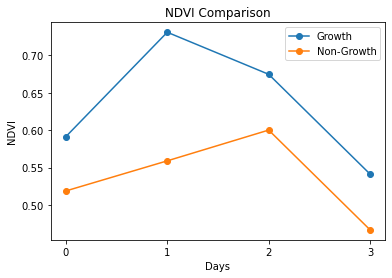

In [46]:
days = list(range(0, end-start+1))

plt.plot(p1_mean, marker='o', label='Growth')
plt.plot(p2_mean, marker='o', label='Non-Growth')
plt.xticks(days)
plt.xlabel('Days')
plt.ylabel('NDVI')
plt.title('NDVI Comparison')
plt.legend(loc='best') 
# plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/NDVI/NDVI_comparison.png')

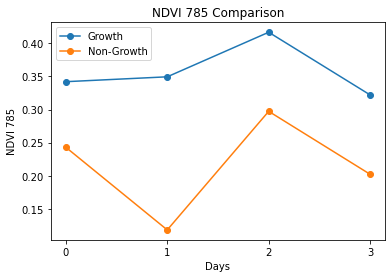

In [47]:
plt.plot(p1_mean2, marker='o', label='Growth')
plt.plot(p2_mean2, marker='o', label='Non-Growth')
plt.xticks(days)
plt.xlabel('Days')
plt.ylabel('NDVI 785')
plt.title('NDVI 785 Comparison')
plt.legend(loc='best') 
#plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/NDVI/NDVI_785_comparison.png')

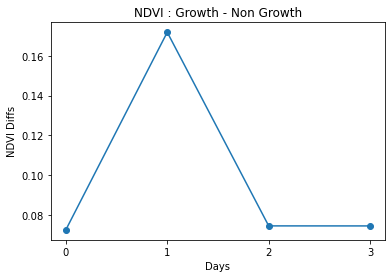

In [48]:
plt.plot(leaf_mean, marker='o')
plt.xticks(days)
plt.title('NDVI : Growth - Non Growth')
plt.xlabel('Days')
plt.ylabel('NDVI Diffs')
# plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/NDVI/NDVI_Diff.png')

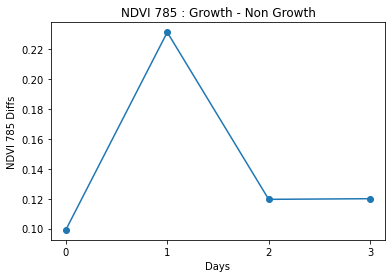

In [49]:
plt.plot(leaf_mean2, marker='o')
plt.xticks(days)
plt.title('NDVI 785 : Growth - Non Growth')
plt.xlabel('Days')
plt.ylabel('NDVI 785 Diffs')
# plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/NDVI/NDVI_785_Diff.png')

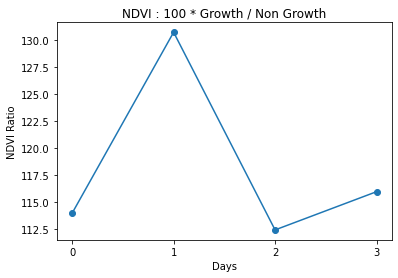

In [50]:
plt.plot(leaf_ratio, marker='o')
plt.xticks(days)
plt.title('NDVI : 100 * Growth / Non Growth')
plt.xlabel('Days')
plt.ylabel('NDVI Ratio')
# plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/NDVI/NDVI_Ratio.png')

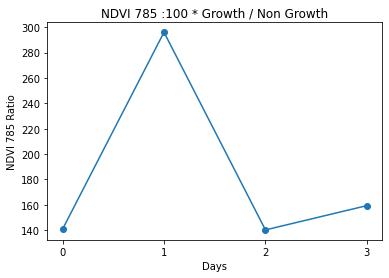

In [51]:
plt.plot(leaf_ratio2, marker='o')
plt.xticks(days)
plt.title('NDVI 785 :100 * Growth / Non Growth')
plt.xlabel('Days')
plt.ylabel('NDVI 785 Ratio')
#plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/NDVI/NDVI_785_Ratio.png')